# Haberman's Cancer Survival DataSet

## A short description of the dataset :

1. This is a case study performed back in 1960's at the at the University of Chicago's Billings Hospital , on the survival of      patients who had undergone surgery.

2. Objective : To predict / classify a patient into one of the two classes of survival status after surgery , given 3 different    parameters.
    
   Survival status : 
       Class attribute 1(Negative) : the patient survived 5 years or longer
       Class attribute 2(Positive) : the patient died within 5 year
   Given the parameters :
       Age of the patient at the time of operation(age), Year of operation(year) ,Number of positive Auxilary nodes detected            (nodes) and survival status(status)

In [55]:
#import required libraries 
import pandas as pd                                                                             
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

#import the dataset as SurvivalDs dataframe
SurvivalDs = pd.read_csv("E:\Applied AI\Exploratory Data Analysis\haberman.csv")    

#Changing status values (1->Negative,2->Positive)
SurvivalDs['status'] = SurvivalDs['status'].apply(lambda x: 'Negative' if x == 1 else 'Positive')
plt.close()

#Getting basic information of the dataset
print("Available parameters : {}".format(SurvivalDs.columns))
print("No of observations Available : {}".format(SurvivalDs.shape))
print("Data Classification : {}".format(SurvivalDs["status"].value_counts()))

Available parameters : Index(['age', 'year', 'nodes', 'status'], dtype='object')
No of observations Available : (306, 4)
Data Classification : Negative    225
Positive     81
Name: status, dtype: int64


### Observations:
1. Total parameters : 4(age , year , nodes ,status).
2. We can use "age , year , nodes" parameters to determine status of the patient.
3. Total data available : 306 patients.
4. Total 225 observations of class 1(Negative) are present and 81 of class 2(Positive) are present.
5. Since class 1 observations are far more than class 2 , we classify this dataset as highly imbalanced dataset.

## Bivariate Analysis using 2D scatter plots

We have 3 parameters , so we can look at 3C2 = 3 differnt combinations of parameters : 

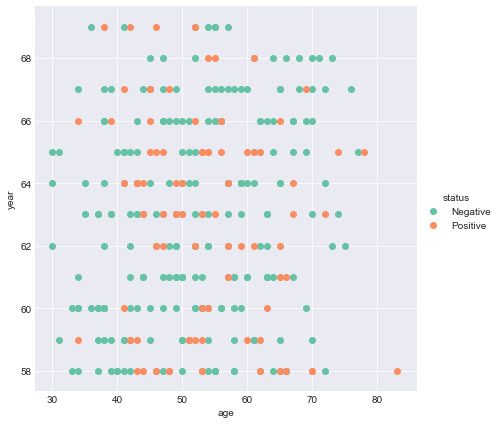

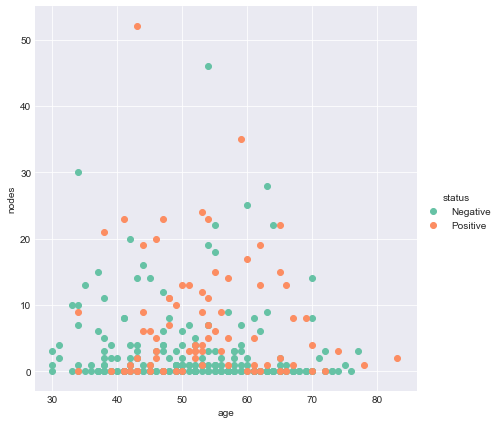

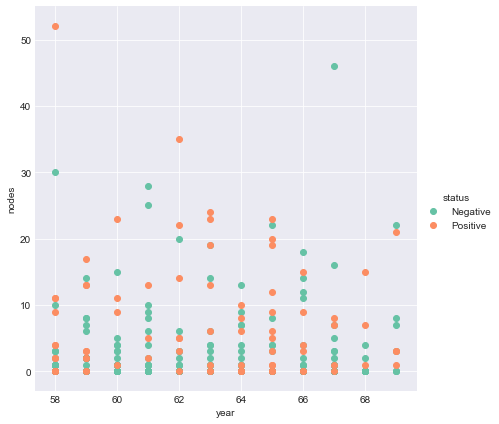

In [54]:
# Lets take age and year as classification parameters.
sns.set_style("darkgrid");
g1 = sns.FacetGrid(SurvivalDs, hue="status", palette="Set2",size=6)
g1.map(plt.scatter, "age", "year")
g1.add_legend();
plt.show()

# Lets take age and nodes as classification parameters.
sns.set_style("darkgrid");
g2=sns.FacetGrid(SurvivalDs, hue="status", palette="Set2",size = 6)
g2.map(plt.scatter, "age", "nodes") 
g2.add_legend();
plt.show()

# Lets take year and nodes as classification parameters.
sns.set_style("darkgrid");
g3=sns.FacetGrid(SurvivalDs, hue="status", palette="Set2",size=6) 
g3.map(plt.scatter, "year", "nodes") 
g3.add_legend();
plt.show()

#Source: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

### Observations:

1. Since we have 2 parameter , we have 3C2 = 3 combinations as shown in the above graph.
2. In each combination of features , since orange and green points are almost linearly inseparable from each other, it is      much harder to classify our results into any one of the classes(positive or negative) using any of the above combination        (ex. age and year , etc.)

## Bivariate analysis using Pair-Plots:

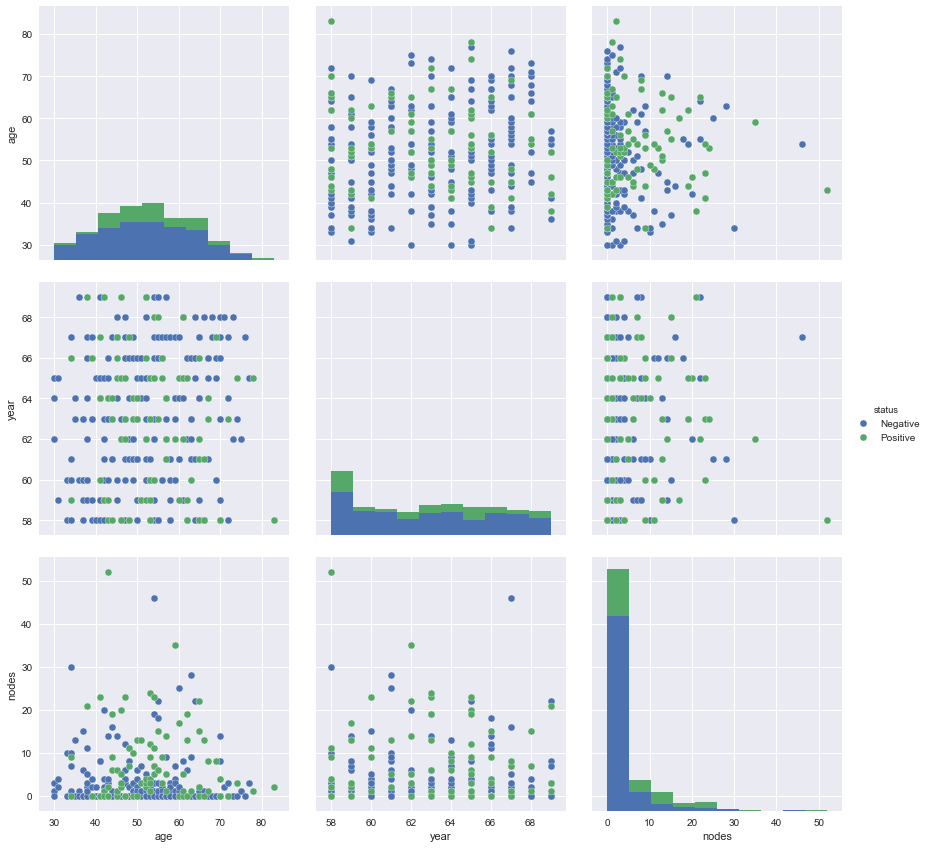

In [57]:
#Analysis using pair, plots
plt.close()
sns.set(style="darkgrid", color_codes=True)
sns.pairplot(SurvivalDs, hue="status",size = 4)
plt.show()

### Observation(s):

1. Using any pair of these three features(age,year,nodes) , it is much harder to separate blue and green points as they overlap    considerably, hence it is hard to build a simple model on this basis.

## Univariate Analysis (Histogram)

Analysis using one feature at a time.

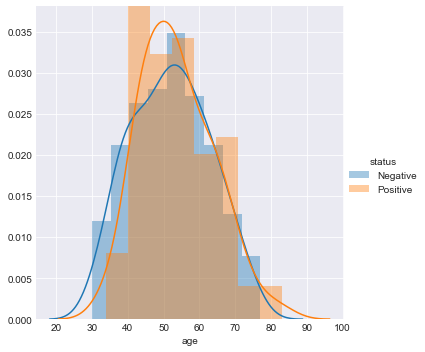

In [56]:
#Using age as a factor
sns.FacetGrid(SurvivalDs, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

### Observations:

1. As we can see , there is a massive overlap of both Positive and Negative classes according to the PDF. Clearly it is hard to    classify the data using Age as a factor .

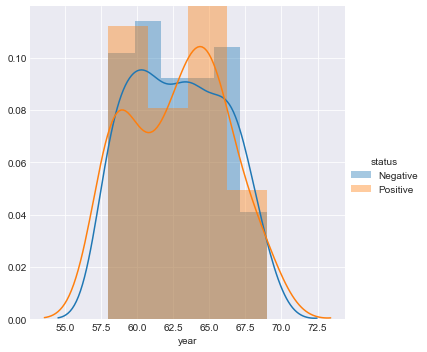

In [57]:
#Using year as a factor
sns.FacetGrid(SurvivalDs, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

### Observations:

1. As we can see , there is a massive overlap of both Positive and Negative classes according to the PDF. Clearly it is hard to    classify the data using Year as a factor .

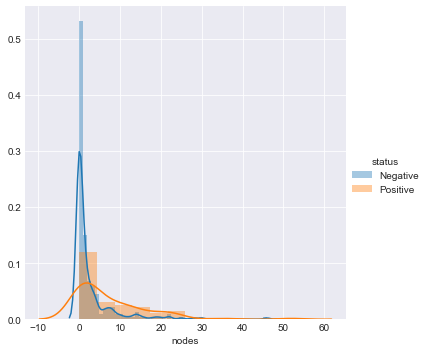

In [58]:
#Using nodes as a factor
sns.FacetGrid(SurvivalDs, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

### Observations:

1) Here , using nodes as a parameter , we get a slightly better PDF than other two factors .
2) Given node range 0 to somewhere around 2 or 3 we see large number of negative result patients compared to positive results ,    otherwise for nodes > 2 or 3 , it is hard to predict as PDF's are massively overlapping. 
3) So, given any one of the three features , it is hard to build a simple model to classify the data into positive or negative.

# Univariate Analysis (PDF and CDF)

In [60]:
import numpy as np
pos = SurvivalDs.loc[SurvivalDs["status"] == "Positive"];
neg = SurvivalDs.loc[SurvivalDs["status"] == "Negative"];


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


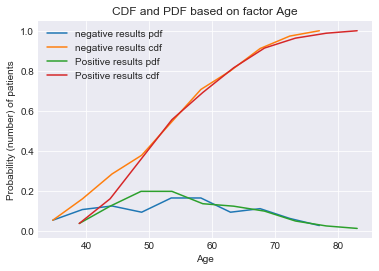

In [64]:
#Take age as a feature and see PDF and CDF for positive and negative points
counts, bin_edges = np.histogram(neg['age'], bins=10, density = True)
pdf = counts/(sum(counts))

#Print probability density according to the bin boundaries.
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'negative results pdf')
plt.plot(bin_edges[1:], cdf,label = 'negative results cdf')

counts, bin_edges = np.histogram(pos['age'], bins=10, density = True)
pdf = counts/(sum(counts))

#Print probability density according to the bin boundaries.
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label ='Positive results pdf')
plt.plot(bin_edges[1:], cdf,label = 'Positive results cdf')
plt.xlabel('Age')
plt.ylabel('Probability (number) of patients')
plt.title('CDF and PDF based on factor Age')
plt.legend()



### Observations:

1. It is hard to build a simple if else model that works for different data . If we try to say that if age is <45 , then result    is negative , 10 % of the time we will predict wrong answer. Plus , only 30 data is having less than 45 age , so this model      is not very useful . similarly we have more drawbacks than advantages if we try to build a simple model based on age. 
2. PDF is massively overlapping.

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


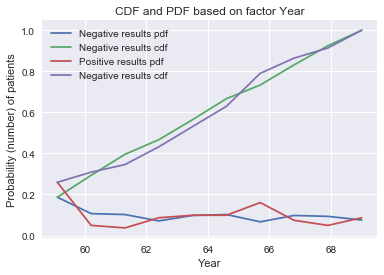

In [76]:
counts, bin_edges = np.histogram(neg['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'Negative results pdf')
plt.plot(bin_edges[1:], cdf , label = 'Negative results cdf')



counts, bin_edges = np.histogram(pos['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'Positive results pdf')
plt.plot(bin_edges[1:], cdf, label = 'Negative results cdf')

plt.xlabel('Year')
plt.ylabel('Probability (number) of patients')
plt.title('CDF and PDF based on factor Year')
plt.legend()


### Observations:

1. CDF for positive and negative results are inseparable . (eg.75% of total positive results fall into positive category with operation being done between 1958-65, same is true for negative results)

2. PDF is massively overlapping.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


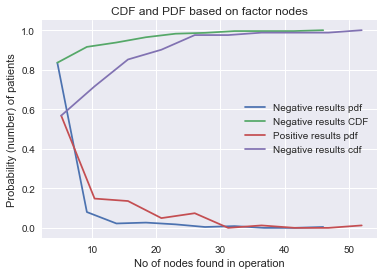

In [79]:
counts, bin_edges = np.histogram(neg['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'Negative results pdf')
plt.plot(bin_edges[1:], cdf, label = 'Negative results CDF')



counts, bin_edges = np.histogram(pos['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'Positive results pdf')
plt.plot(bin_edges[1:], cdf, label = 'Negative results cdf')


plt.xlabel('No of nodes found in operation')
plt.ylabel('Probability (number) of patients')
plt.title('CDF and PDF based on factor nodes')
plt.legend()

### Observations:

1. CDF for positive and negative results are inseparable.
2. PDF is massively overlapping.

## Analysis based on Mean and Standard Deviation

In [80]:
print("Means for age as a parameter:")
print("Mean age for negative results:{}".format(np.mean(neg["age"])))
print("Mean age for Positive results:{}".format(np.mean(pos["age"])))

print("\nStd-dev for age as a parameter:");
print("Std deviation of age for negative results:{}".format(np.std(neg["age"])))
print("Std deviation of age for Positive results:{}".format(np.std(pos["age"])))



Means:
Mean age for negative results:52.01777777777778
52.01777777777778
Mean age for Positive results:53.67901234567901

Std-dev:
Std deviation of age for negative results:10.98765547510051
52.01777777777778
Std deviation of age for Positive results:10.10418219303131


In [81]:
print("Means for year as a parameter:")
print("Mean year for negative results:{}".format(np.mean(neg["year"])))
print("Mean year for Positive results:{}".format(np.mean(pos["year"])))

print("\nStd-dev for year as a parameter:");
print("Std deviation of year for negative results:{}".format(np.std(neg["year"])))
print("Std deviation of year for Positive results:{}".format(np.std(pos["year"])))



Means for year as a parameter:
Mean year for negative results:62.86222222222222
Mean year for Positive results:62.82716049382716

Std-dev for year as a parameter:
Std deviation of year for negative results:3.2157452144021956
Std deviation of year for Positive results:3.3214236255207883


In [82]:
print("Means for nodes as a parameter:")
print("Mean nodes for negative results:{}".format(np.mean(neg["nodes"])))
print("Mean nodes for Positive results:{}".format(np.mean(pos["nodes"])))

print("\nStd-dev for nodes as a parameter:");
print("Std deviation of nodes for negative results:{}".format(np.std(neg["nodes"])))
print("Std deviation of nodes for Positive results:{}".format(np.std(pos["nodes"])))



Means for nodes as a parameter:
Mean nodes for negative results:2.7911111111111113
Mean nodes for Positive results:7.45679012345679

Std-dev for nodes as a parameter:
Std deviation of nodes for negative results:5.857258449412131
Std deviation of nodes for Positive results:9.128776076761632


### Observations:

1. Mean value for both positive and negative results are almost same for features age and year of operation.
2. Mean values for positive and negative results for number of nodes differ significantly. 
   Mean nodes for negative results                               :2.7911111111111113
   Mean nodes for Positive results                               :7.45679012345679
   Std deviation of nodes for negative results                   :5.857258449412131
   Std deviation of nodes for Positive results                   :9.128776076761632
   
3. We can try a simple if else loop taking mean and std deviation into consideration .
   ex.     if nodes are <= (2.79+5.85) and >=0 : negative 
           if nodes are <= (7.45+9.12) and >=0 : positive
           So, basically ,
           if(nodes >=2.79+5.85):Positive, else we cannot differntiate between positive and negative. 

## Analysis by Median , Percentile , Quantile , MAD

In [84]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians taking age as a parameter:")
print("Median for negative results:{}".format(np.median(neg["age"])))
print("Median for positive results:{}".format(np.median(pos["age"])))

print("\nMedians taking year as a parameter:")
print("Median for negative results:{}".format(np.median(neg["year"])))
print("Median for positive results:{}".format(np.median(pos["year"])))

print("\nMedians taking nodes as a parameter:")
print("Median for negative results:{}".format(np.median(neg["nodes"])))
print("Median for positive results:{}".format(np.median(pos["nodes"])))                                                        
                                                        



Medians taking age as a parameter:
Median for negative results:52.0
Median for positive results:53.0

Medians taking year as a parameter:
Median for negative results:63.0
Median for positive results:63.0

Medians taking nodes as a parameter:
Median for negative results:0.0
Median for positive results:4.0


In [87]:
print("\nQuantiles[0,25,50,75] for age as a factor:")
print(np.percentile(neg["age"],np.arange(0, 100, 25)))
print(np.percentile(pos["age"],np.arange(0, 100, 25)))

print("\nQuantiles[0,25,50,75] for year as a factor:")
print(np.percentile(neg["year"],np.arange(0, 100, 25)))
print(np.percentile(pos["year"],np.arange(0, 100, 25)))

print("\nQuantiles[0,25,50,75,100] for nodes as a factor:")
print(np.percentile(neg["nodes"],np.arange(0, 101, 25)))
print(np.percentile(pos["nodes"],np.arange(0, 101, 25)))



Quantiles[0,25,50,75] for age as a factor:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

Quantiles[0,25,50,75] for year as a factor:
[58. 60. 63. 66.]
[58. 59. 63. 65.]

Quantiles[0,25,50,75,100] for nodes as a factor:
[ 0.  0.  0.  3. 46.]
[ 0.  1.  4. 11. 52.]


In [88]:


from statsmodels import robust
print ("\nMedian Absolute Deviation for age as a factor")
print(robust.mad(neg["age"]))
print(robust.mad(pos["age"]))

print ("\nMedian Absolute Deviation for year as a factor")
print(robust.mad(neg["year"]))
print(robust.mad(pos["year"]))

print ("\nMedian Absolute Deviation for nodes as a factor")
print(robust.mad(neg["nodes"]))
print(robust.mad(pos["nodes"]))




Median Absolute Deviation for age as a factor
13.343419966550417
11.860817748044816

Median Absolute Deviation for year as a factor
4.447806655516806
4.447806655516806

Median Absolute Deviation for nodes as a factor
0.0
5.930408874022408


## Analysis using Box Plot and Whiskers

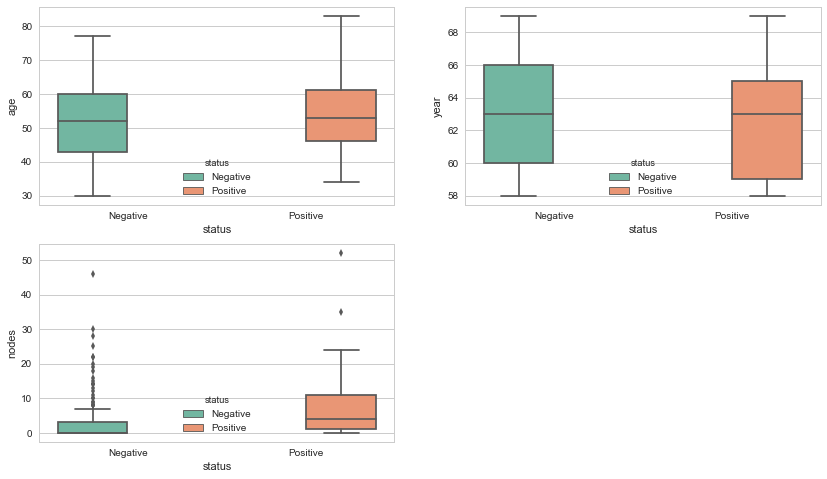

In [121]:
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.set(style="whitegrid")
sns.boxplot(x='status',y='age', hue = "status",data=SurvivalDs,palette="Set2")
plt.subplot(222)
sns.set(style="whitegrid")
sns.boxplot(x='status',y='year', hue = "status",data=SurvivalDs,palette="Set2")
plt.subplot(223)
sns.set(style="whitegrid")
sns.boxplot(x='status',y='nodes', hue = "status",data=SurvivalDs,palette="Set2")
plt.show()

### Observations:

1. With age or year as a feature , quantiles (25%,50%,75%) values are massively overlapping.
2. With nodes as a factor , we get a slightly better result as all the negative results have nodes <=(7 or 8)
   but from the above boxplot , we can see that almost 65% results are overlapping.

# Analysis using Violin Plots

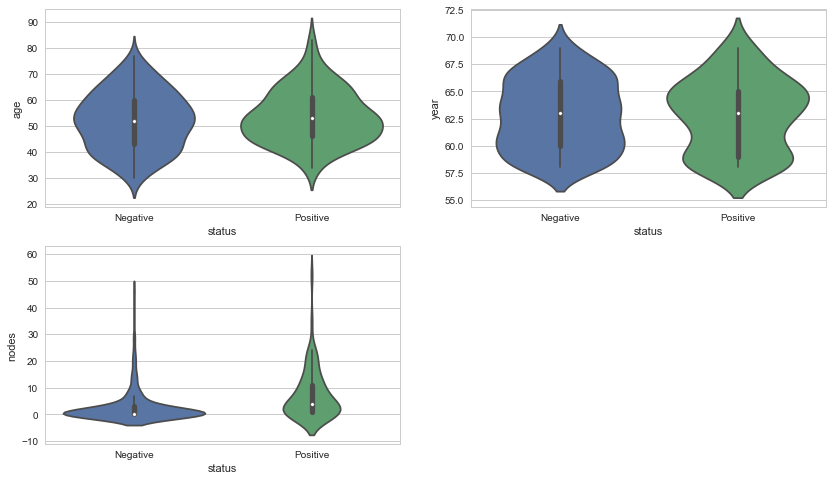

In [122]:

plt.figure(figsize=(14,8))
plt.subplot(221)
sns.set(style="whitegrid")
sns.violinplot(x="status", y="age", data=SurvivalDs, size=8)
plt.subplot(222)
sns.set(style="whitegrid")
sns.violinplot(x="status", y="year", data=SurvivalDs, size=8)
plt.subplot(223)
sns.set(style="whitegrid")
sns.violinplot(x="status", y="nodes", data=SurvivalDs, size=8)
plt.show()

### Observations:

1. We can see the plots are spread almost equally for age or year as a factor.
2. We have more negative results for nodes between (0-2 or 3) than positive results . Otherwise , the plot is almost equally        spread

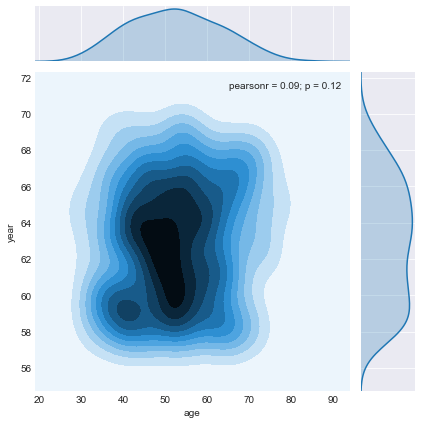

In [66]:
sns.jointplot(x="age", y="year", data=SurvivalDs, kind="kde");
plt.show();

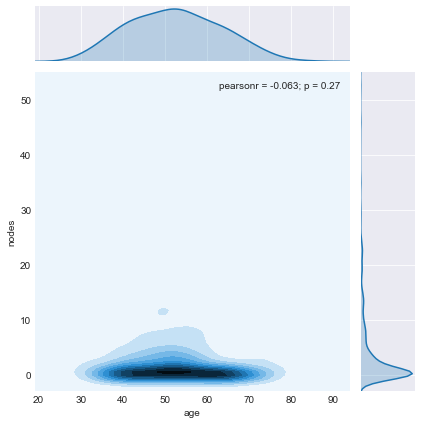

In [67]:
sns.jointplot(x="age", y="nodes", data=SurvivalDs, kind="kde");
plt.show();

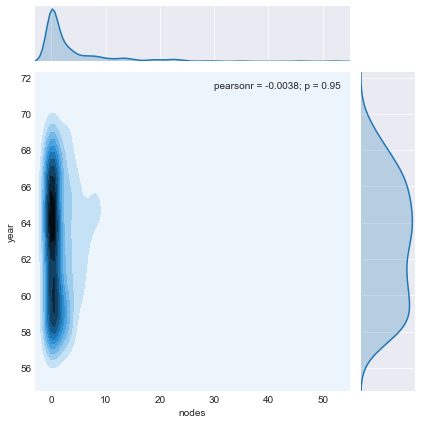

In [68]:
sns.jointplot(x="nodes", y="year", data=SurvivalDs, kind="kde");
plt.show();

### Observations:

1. Using age and year plot , we can see that the results are uniformly spread across year and bell curve for age
2. Using nodes and age , we can see that results are densly distributed at a point across no of nodes , same is true for year and node plot.
